<a href="https://colab.research.google.com/github/Carvas91/ML_algorithms_practice/blob/main/stat_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
sacramento = pd.read_csv("https://raw.githubusercontent.com/UofT-DSI/LCR/refs/heads/main/01_materials/notebooks/dataset/sacramento.csv")
sacramento.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779


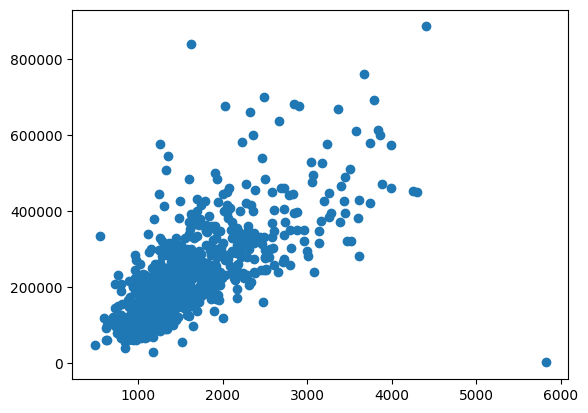

In [4]:
# Plot the relationship between x and y
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='House size vs House price')

In [5]:
#simple linear reg
model = smf.ols("price ~ sq__ft", data=sacramento).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     753.2
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          7.67e-118
Time:                        23:15:54   Log-Likelihood:                -10406.
No. Observations:                 814   AIC:                         2.082e+04
Df Residuals:                     812   BIC:                         2.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.021e+04   7865.211      3.841      0.0

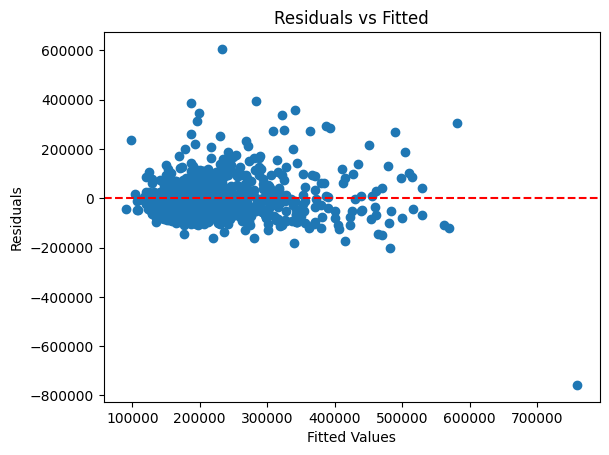

In [6]:
# Residual plots
fitted = model.fittedvalues
residuals = model.resid


# Homoscedasticity: Residuals vs. Fitted
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


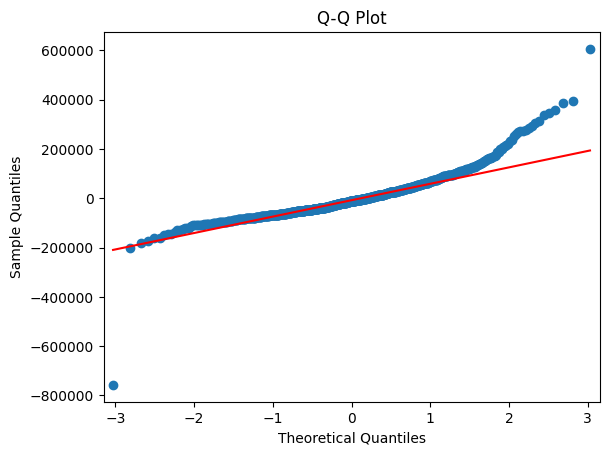

In [8]:
sm.qqplot(residuals, line = 'q')
plt.title('Q-Q Plot')
plt.show()

In [9]:
#multivariable linear reg
multi_model = smf.ols("price ~ sq__ft + beds", data=sacramento).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     381.0
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          2.15e-117
Time:                        23:32:06   Log-Likelihood:                -10404.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     811   BIC:                         2.083e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.04e+04   1.19e+04      4.221      0.0

In [10]:
sacramento["type"].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

In [12]:
sacramento_encoded = pd.get_dummies(sacramento, columns=["type"], drop_first=True)
sacramento_encoded.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606,False,True
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947,False,True
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259,False,True
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199,False,True
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779,False,True


In [13]:
#Replace - for _
sacramento_encoded.columns = sacramento_encoded.columns.str.replace('-', '_')

In [15]:
#fit multivariable with category model
multi_cat_model = smf.ols("price ~ sq__ft + beds + type_Multi_Family + type_Residential", data=sacramento_encoded).fit()
print(multi_cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     194.9
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          5.87e-117
Time:                        23:45:58   Log-Likelihood:                -10399.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     809   BIC:                         2.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [21]:
import seaborn as sns

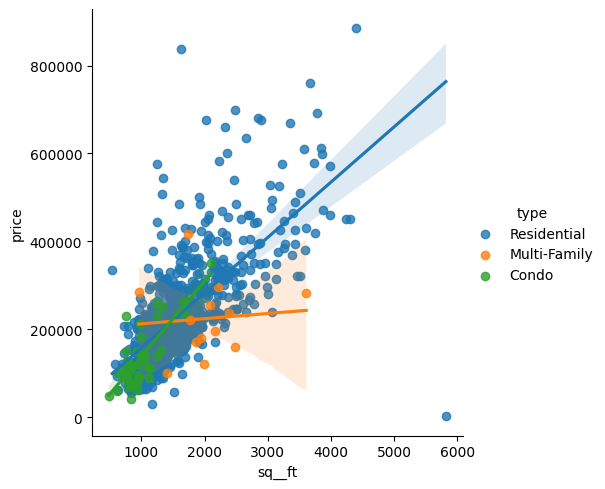

In [22]:
sns.lmplot(x="sq__ft",y="price",hue="type",data=sacramento)